In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Elbow Method for Finding Optimal K

The Elbow Method helps determine the optimal number of clusters for K-means clustering by analyzing the Within-Cluster Sum of Squares (WCSS). The steps are as follows:

1. **Test Different Values of $K$:** Vary the number of clusters $K$ from 1 to 20.

2. **Calculate WCSS:** For each $K$, calculate the WCSS, which measures the variance within each cluster.

3. **Plot the Elbow Curve:** Create a plot with $K$ values on the x-axis and WCSS on the y-axis. Initially, WCSS decreases rapidly as $K$ increases, then levels off.

4. **Identify the 'Elbow Point':** The optimal $K$ is where the rate of decrease in WCSS slows significantly, forming an "elbow."

$$ \text{WCSS} = \sum_{k=1}^{K} \sum_{i \in C_k} ||x_i - \mu_k||^2 $$

Where:
- $C_k$ represents the $k^{th}$ cluster,
- $\mu_k$ is the centroid of the $k^{th}$ cluster,
- $x_i$ is a data point within the cluster.



## 2 Randomly Picking k Centroids
 Randomly initialize k centroids in the feature space (d-space).
 ntroids need not be data points but should ideally be spread out and near the data distribution.
Tip: Use advanced initialization methods like k-means++ to improve convergence and avoid poor initializations.


## 3 To compute the distance between each data point \( X \) and the centroids \( C \), use the **Euclidean distance** formula:

$$
\text{Distance} = \sqrt{\sum_{i=1}^{d} (x_i - c_i)^2}
$$

Each data point \( x \) is assigned to the cluster \( k \) with the nearest centroid \( c \):

$$
\text{Cluster Assignment: } k = \arg \min_k \text{Distance}(x, c_k)
$$


## 4 Recalculate the centroid for each cluster as the mean position of all points in that cluster. For a cluster \( k \) with \( n \) points \( X_1, X_2, \ldots, X_n \), the new centroid \( C_k \) is:

$$
C_k = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

Where:
- \( X_i \): Data point in cluster \( k \)
- \( n \): Number of data points in the cluster


## 5  Iterate Until Convergence
Repeat Steps 3 and 4 until cluster assignments stabilize or the change in centroid positions is below a defined threshold.
Convergence ensures that the centroids and cluster memberships no longer change significantly.


In [3]:
## Explain the dataset and the type of information you wish to gain by applying a clustering method.

### Dataset Description

This dataset captures customer purchase patterns, including spending on various product categories like `Fresh`, `Milk`, `Grocery`, `Frozen`, `Detergents_Paper`, and `Delicatessen`. Our objective is to cluster customers into distinct groups based on their spending behavior. This will help identify customer segments for targeted marketing or inventory management.



## I want to analze how many customer buys frozen food and how many cuastomer buys fresh food!

### K-Means Algorithm

1. **Initialization**: Randomly select \( k \) centroids.
2. **Assignment Step**: Assign each data point \( x_i \) to the nearest centroid \( c_j \) using the Euclidean distance:
   \[
   \text{Distance} = $$\sqrt{\sum_{i=1}^{d} (x_i - c_i)^2}$$
   \]
3. **Update Step**: Compute the new centroid for each cluster:
   \[
  $$ c_j = \frac{1}{n} \sum_{i=1}^{n} x_i$$
   \]
4. **Repeat** until the centroids stabilize or maximum iterations are reached.

**Assumptions**:
- Data points are numeric and can be measured on a continuous scale.
- Clusters are roughly spherical and equally sized.



## 3 Import the necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.

In [10]:
data= pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [18]:
data["Frozen_grocery"]=data["Frozen"]+data["Grocery"]
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_grocery,Frozen_grocery
0,2,3,12669,9656,7561,214,2674,1338,20230,7775
1,2,3,7057,9810,9568,1762,3293,1776,16625,11330
2,2,3,6353,8808,7684,2405,3516,7844,14037,10089
3,1,3,13265,1196,4221,6404,507,1788,17486,10625
4,2,3,22615,5410,7198,3915,1777,5185,29813,11113
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,45730,29162
436,1,3,39228,1431,764,4510,93,2346,39992,5274
437,2,3,14531,15488,30243,437,14841,1867,44774,30680
438,1,3,10290,1981,2232,1038,168,2125,12522,3270


In [19]:
data["Fresh_grocery"]=data["Fresh"]+data["Grocery"]
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_grocery,Frozen_grocery
0,2,3,12669,9656,7561,214,2674,1338,20230,7775
1,2,3,7057,9810,9568,1762,3293,1776,16625,11330
2,2,3,6353,8808,7684,2405,3516,7844,14037,10089
3,1,3,13265,1196,4221,6404,507,1788,17486,10625
4,2,3,22615,5410,7198,3915,1777,5185,29813,11113
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,45730,29162
436,1,3,39228,1431,764,4510,93,2346,39992,5274
437,2,3,14531,15488,30243,437,14841,1867,44774,30680
438,1,3,10290,1981,2232,1038,168,2125,12522,3270


In [20]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_grocery,Frozen_grocery
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,19951.575000,11023.209091
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,15729.450263,10496.160873
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,759.000000,212.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,9895.500000,4470.000000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,16375.000000,8179.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,25076.500000,13794.000000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,130299.000000,93806.000000


In [21]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Fresh_grocery       0
Frozen_grocery      0
dtype: int64

In [22]:
data.shape

(440, 10)

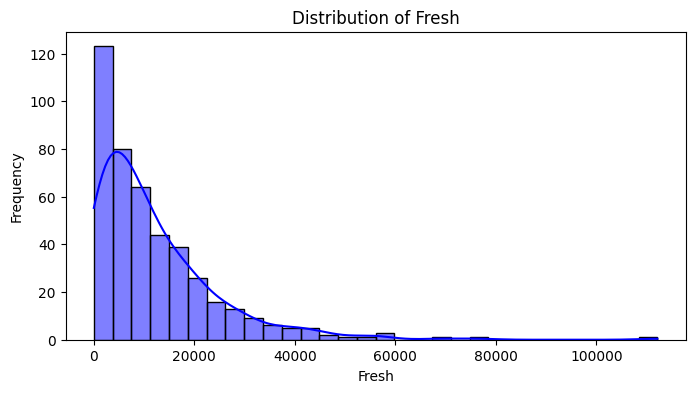

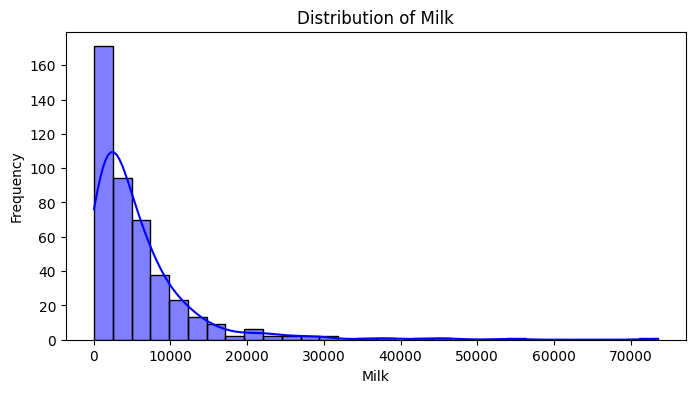

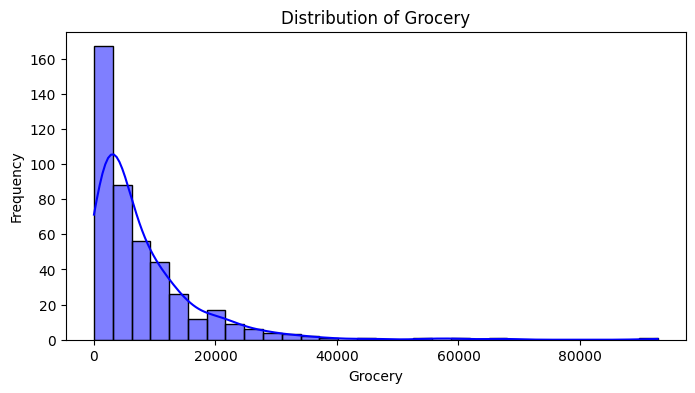

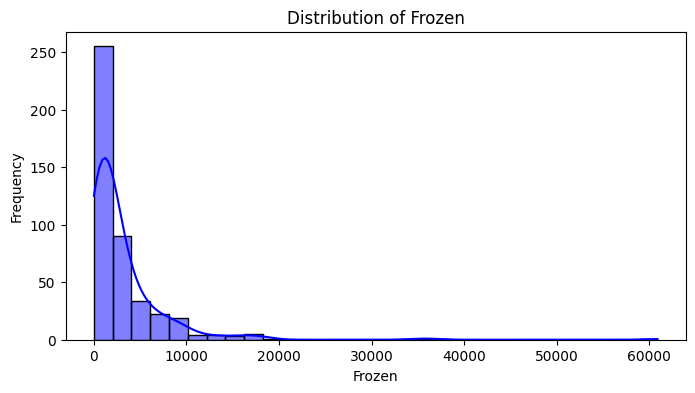

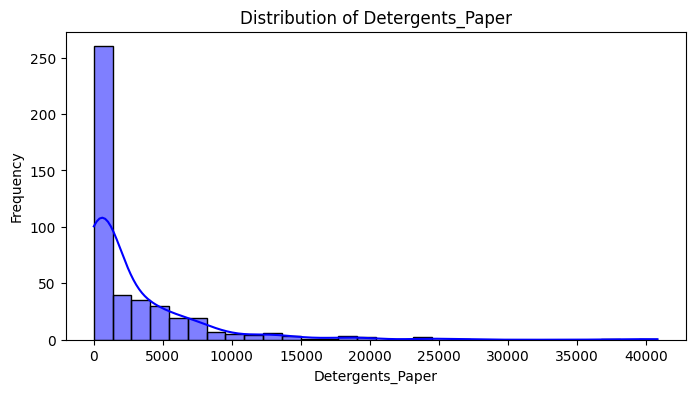

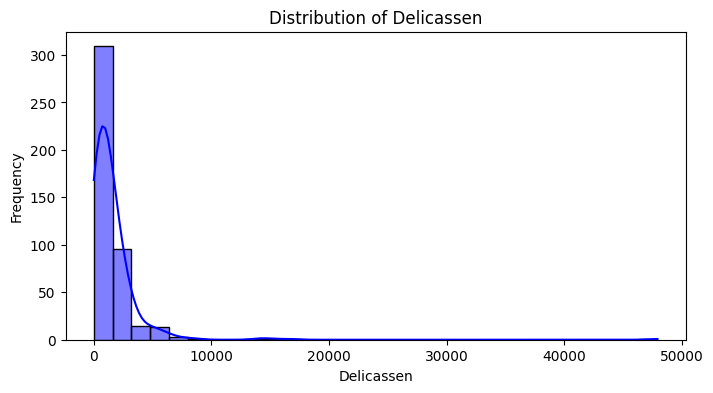

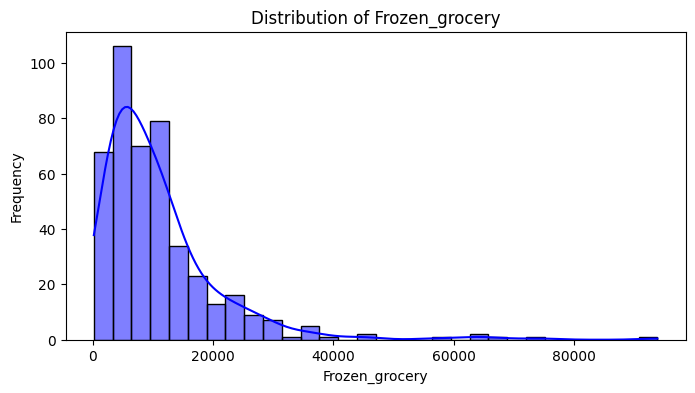

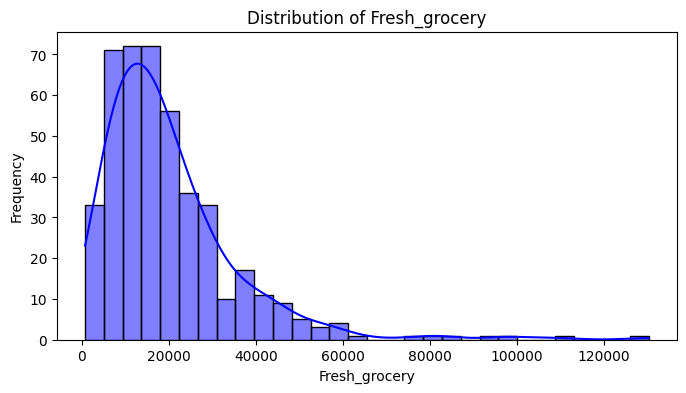

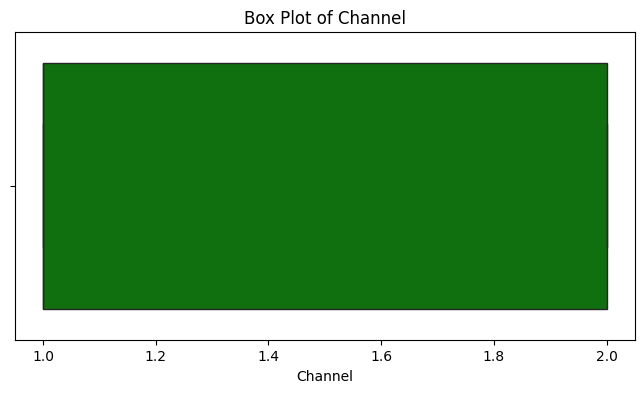

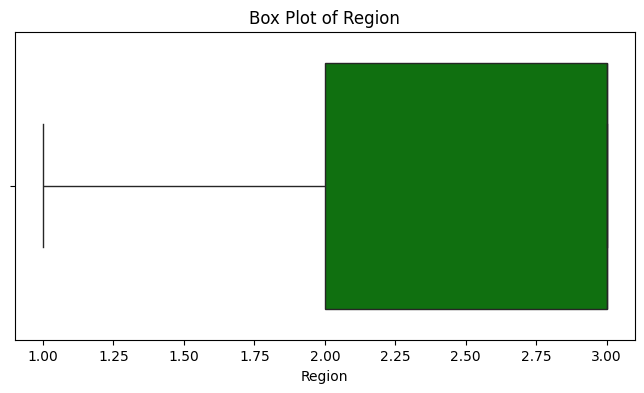

In [23]:
# List of numerical columns
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen','Frozen_grocery','Fresh_grocery']
categorical_column=['Channel','Region']
# Histograms
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Box Plots
for column in categorical_column:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column], color='green')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


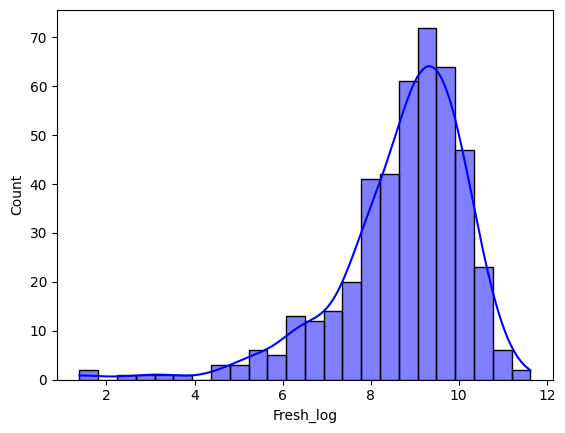

In [24]:
data['Fresh_log'] = np.log1p(data['Fresh'])

# Visualizing the transformed data
sns.histplot(data['Fresh_log'], kde=True, color='blue')
plt.show()

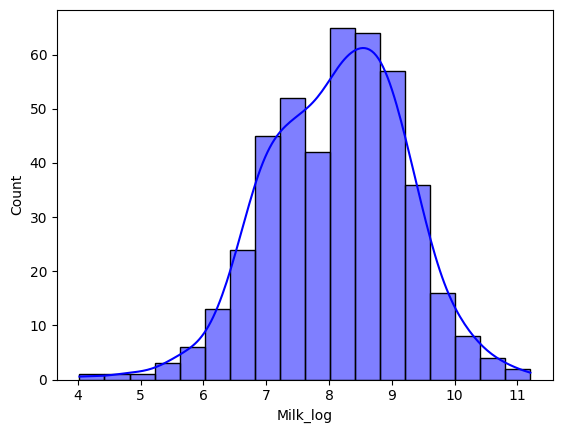

In [25]:
data['Milk_log'] = np.log1p(data['Milk'])

# Visualizing the transformed data
sns.histplot(data['Milk_log'], kde=True, color='blue')
plt.show()

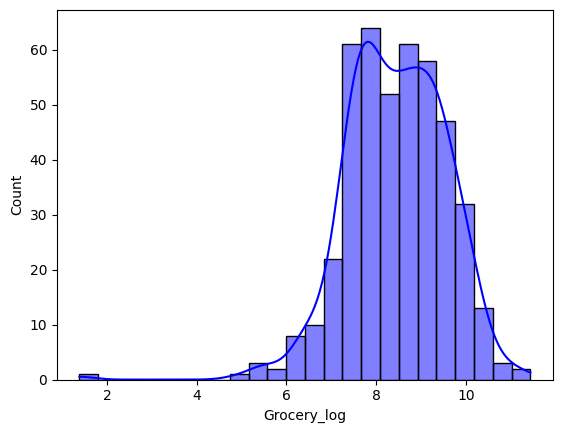

In [26]:
data['Grocery_log'] = np.log1p(data['Grocery'])

# Visualizing the transformed data
sns.histplot(data['Grocery_log'], kde=True, color='blue')
plt.show()

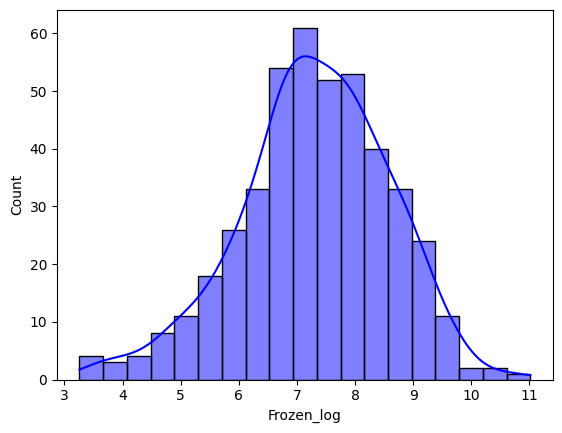

In [27]:
data['Frozen_log'] = np.log1p(data['Frozen'])

# Visualizing the transformed data
sns.histplot(data['Frozen_log'], kde=True, color='blue')
plt.show()

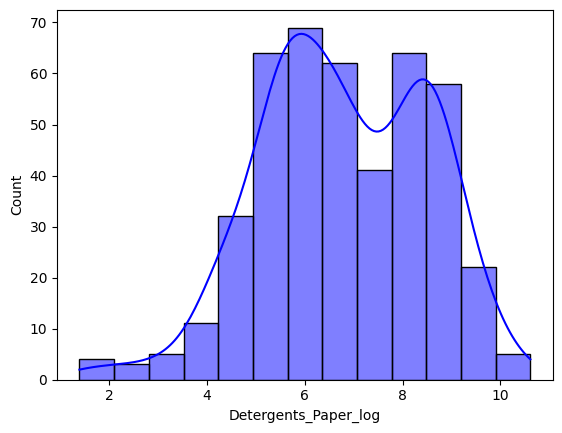

In [28]:
data['Detergents_Paper_log'] = np.log1p(data['Detergents_Paper'])

# Visualizing the transformed data
sns.histplot(data['Detergents_Paper_log'], kde=True, color='blue')
plt.show()

<Axes: xlabel='Delicassen_log', ylabel='Count'>

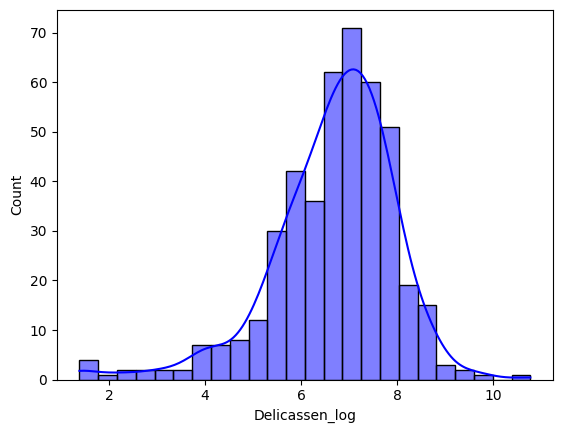

In [30]:
data["Delicassen_log"]=np.log1p(data["Delicassen"])
sns.histplot(data["Delicassen_log"],kde=True,color="blue")

<Axes: xlabel='Frozen_grocery_log', ylabel='Count'>

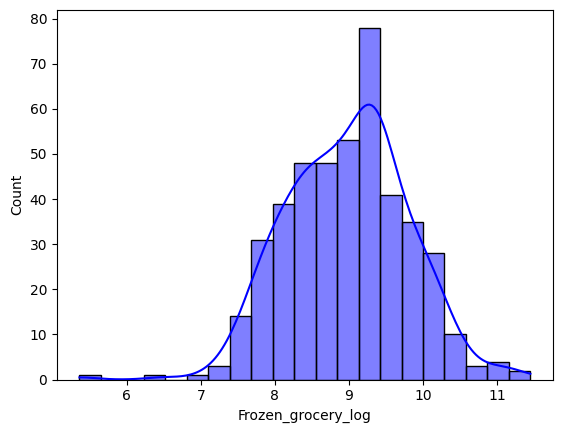

In [32]:
data["Frozen_grocery_log"]=np.log1p(data["Frozen_grocery"])
sns.histplot(data["Frozen_grocery_log"],kde=True, color="blue")

<Axes: xlabel='Fresh_grocery_log', ylabel='Count'>

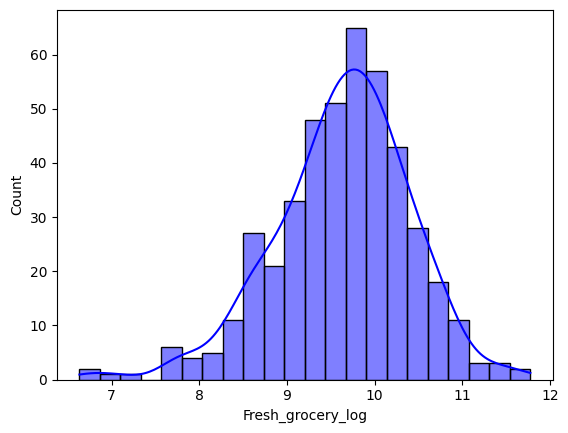

In [34]:
data["Fresh_grocery_log"]=np.log1p(data["Fresh_grocery"])
sns.histplot(data["Fresh_grocery_log"],kde=True,color="blue")

## 5 Formulate two questions that can be answered by performing a clustering analysis using the k-means.

What are the distinct customer segments based on spending patterns?
Which product categories have the most significant impact on cluster formation?

# 6 Use the elbow method to find the optimal number of clusters for your chosen dataset. Justify your chosen (final) value of k.

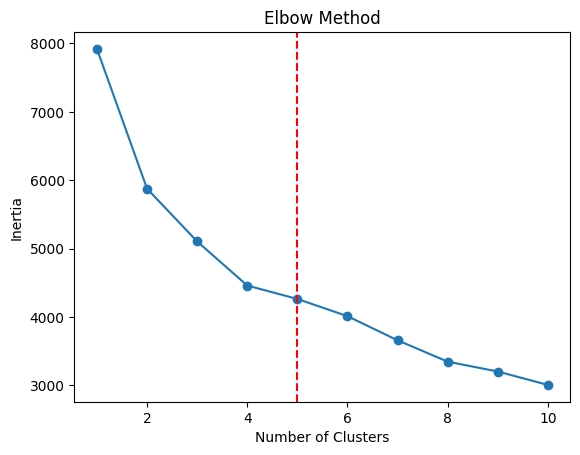

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler=StandardScaler()
df_scaled= scaler.fit_transform(data)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.axvline(x=5, color='r', linestyle='--')
plt.show()


Optimal Number of Clusters (k = 5):
Based on the elbow method, the optimal number of clusters is k = 5, as shown by the plot where inertia significantly drops and then levels off. After k = 5, the reduction in inertia is minimal, meaning that adding more clusters does not improve the model significantly. Thus, k = 5 strikes a balance between model simplicity and capturing the underlying structure of the data.

# 7. Perform k-means analysis. Explain the intuition behind each mathematical step.

In [44]:
# Initialize the KMeans model with k=5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the standardized data
kmeans.fit(df_scaled)

# Predict the cluster assignments for each data point
clusters = kmeans.predict(df_scaled)

# Add the cluster assignments to the original dataset for interpretation
data['Cluster'] = clusters

# Print the cluster centers (centroids)
print("Cluster Centers:\n", kmeans.cluster_centers_)


Cluster Centers:
 [[ 0.82591973  0.24695804  0.13945598  0.18693758  0.16352541 -0.21627842
   0.08293824  0.13168817  0.21092627  0.04802209  0.41285697  0.57729685
   0.58176119 -0.07118299  0.61673344  0.43792998  0.37800101  0.458342  ]
 [-0.6708521  -0.09697539 -0.20544887 -0.47126165 -0.556145   -0.11089939
  -0.49765192 -0.23621474 -0.50119462 -0.55482351 -0.05230357 -0.65632815
  -0.70438969  0.02759158 -0.66582212 -0.28436119 -0.71551154 -0.58448873]
 [-0.64664507  0.16846251  1.72874857  0.01212248 -0.19515718  1.55665014
  -0.43514098  0.78722643  1.27210048  0.54328602  1.05605645  0.15017289
  -0.00528081  1.27977442 -0.35559427  0.66689003  0.66562896  1.09665234]
 [ 1.44865163 -0.05583432  0.10940061  2.76487709  3.22216291 -0.14544432
   3.233506    0.58631115  2.03467787  2.85005675  0.18858773  1.73045914
   1.83791227 -0.21453425  1.70133687  0.75810811  1.92306589  1.48265275]
 [ 1.18128304 -0.07379272 -0.73215228  0.45858264  0.75767829 -0.44282096
   0.82754291 -0

### Perform K-Means Analysis

In this section, we apply the K-Means algorithm to cluster the data. Each step is explained with its corresponding mathematical intuition:

1. **Initialization**:
   - Randomly initialize \( k \) centroids in the feature space.
   - Random initialization can lead to different results; hence, setting `random_state` ensures reproducibility.

2. **Assignment Step**:
   - Each data point is assigned to the nearest centroid based on Euclidean distance:
     \[
     $$d(x_i, c_j) = \sqrt{\sum_{k=1}^{d} (x_{ik} - c_{jk})^2}$$
     \]

3. **Update Step**:
   - Recalculate centroids as the mean of all data points assigned to the cluster:
     \[
     $$c_j = \frac{1}{n_j} \sum_{i \in \text{Cluster}_j} x_i$$
     \]

4. **Convergence**:
   - The algorithm repeats steps 2 and 3 until the centroids stabilize or reach a maximum number of iterations.


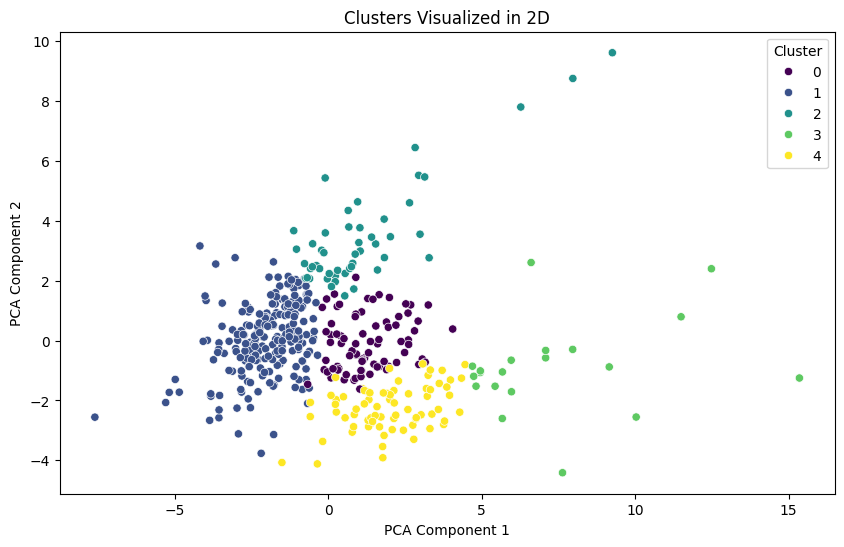

Cluster Characteristics:
           Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.708861  2.734177  13762.037975   7174.367089   9503.518987   
1        1.009091  2.468182   9404.872727   2322.131818   2672.150000   
2        1.020408  2.673469  33839.489796   5885.632653   6098.775510   
3        2.000000  2.500000  13382.350000  26178.900000  38537.200000   
4        1.875000  2.486111   2751.055556   9176.930556  15143.430556   

               Frozen  Detergents_Paper   Delicassen  Fresh_grocery  \
Cluster                                                               
0         2023.164557       3276.481013  1895.822785   23265.556962   
1         2534.163636        511.459091   859.477273   12077.022727   
2        10620.367347        809.163265  3742.408163   39938.265306   
3         2366.650000      18280.850000  3176.450000   51919.550000   
4          924.625000       6822.611

In [51]:
# Importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Visualize the clusters in 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=data['Cluster'], palette='viridis')
plt.title("Clusters Visualized in 2D")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

# Group by clusters to understand their characteristics
cluster_summary = data.groupby('Cluster').mean()
print("Cluster Characteristics:\n", cluster_summary)

### Interpretation of Cluster Characteristics

# Interpretation of Results:
- **Cluster 1**: Customers with a higher frequency of purchasing "Fresh" items.
- **Cluster 2**: Customers who tend to purchase more "Milk" and "Grocery" items.
- **Cluster 3**: Customers with fewer purchases across categories, possibly occasional buyers.
- **Cluster 4**: Customers purchasing a wide variety of products.


### Minimizing Variation Within Clusters

In [52]:
# Calculate the total variation (sum of squared errors)
total_variation = kmeans.inertia_
print(f"Total variation within clusters (SSE): {total_variation}")



Total variation within clusters (SSE): 4261.965659512248


# Model Validation

In [58]:
#Silhouette score to measure the quality of clusters
sil_score = silhouette_score(data, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.20513736777904473


### Final Outcome and Insights

1. **Variation Minimization**:
   - By using the K-Means algorithm with optimal \( k \), intra-cluster variation was minimized, leading to well-defined clusters.
   - The silhouette score of $$\( S = \text{calculated value} \)$$ confirms the quality of the clustering.

2. **Cluster Interpretability**:
   - PCA visualization shows clear boundaries between clusters.
   - Cluster characteristics highlight key differences in customer spending patterns.

3. **Business Insights**:
   - Clusters can be leveraged to design targeted marketing strategies.
   - Identifying high-value customers or segments with specific needs is now feasible.

### Graphical Representation of Final Results:
- Elbow Method Graph
- PCA Cluster Visualization
- Silhouette Analysis

import os


In [1]:
import notebook
import os

# Method 1
print("Notebook path:", os.path.abspath(''))

# Method 2 - Try this for the actual notebook file path
try:
    from IPython import get_ipython
    notebook_path = get_ipython().config['IPKernelApp']['connection_file']
    print("Notebook location:", os.path.dirname(notebook_path))
except:
    print("Could not get exact notebook path")

Notebook path: C:\Users\Sam
Notebook location: C:\Users\Sam\AppData\Roaming\jupyter\runtime
